# Read the slide first [slide link](https://docs.google.com/presentation/d/1Sh2-z-4JuH1vMzdT2qWeisXVj0qztKMJ/edit?usp=sharing&ouid=100216673605729372437&rtpof=true&sd=true)

Try out Interactive **Max Heap** Simulation by Visualgo.net](https://visualgo.net/en/heap)


## Max Heap Operations and Their Descriptions

1. **`max_heapify(A, i)`**  
   - Ensures the heap property for the array `A`, starting at node `i`.  
   - Also known as the **“sink”** operation since it **moves lighter elements down the tree.**


2. **`build_max_heap(A)`**  
   - Builds a max-heap from an array `A`.

3. **`get_maximum(A)`**  
   - Returns the element with the **largest key** from the heap.

4. **`heap_extract_max(A)`**  
   - Extracts the **largest element** from the heap `A`.  
   - Often referred to as **“delete”** in some contexts (The CSE220 note).

5. **`heap_delete_any_node(heap, idx)`**  
   - Deletes a node at any given index `idx` in the heap while maintaining the heap property.  
   - The function swaps the node to be deleted with the root, then extracts the maximum value (root) to remove it.

6. **`heap_increase_key(A, i, key)`**  
   - Increases the value of the element at node `i` to `key`.  
   - Ensures the heap property for `A` by **moving larger elements upwards.**  
   - Also referred to as the **“swim”** operation.

7. **`max_heap_insert(A, key)`**  
   - Inserts `key` into the heap `A`, maintaining its heap property.

8. **`get_heap_size()`**  
   - Returns the number of nodes in the heap.


9. **`heapsort(A)`**  
   - Sorts the elements in array `A` using heap operations.

### max_heapify(A, i), build_max_heap(A), get_maximum(S), get_heap_size()

*   max_heapify(A, i)
*   build_max_heap(A)
*   get_maximum(S)
*   get_heap_size()


In [ ]:
def get_left_child_index(idx):
    """
    Returns the index of the left child of the node at `idx`.
    """
    return 2 * idx

def get_right_child_index(idx):
    """
    Returns the index of the right child of the node at `idx`.
    """
    return 2 * idx + 1

def get_parent_index(idx):
    """
    Returns the index of the parent of the node at `idx`,
    or None if `idx` is the root.
    """
    if idx == 1: # root
        return None
    else:
        return idx // 2 # floor division

def get_heap_size(heap):
    """
    Returns the number of valid elements in the heap by
    counting non-None entries starting from index 1.
    """
    # Count non-None elements starting from index 1
    count = 0
    for i in range(1, len(heap)):
        if heap[i] is not None:
            count += 1
    return count

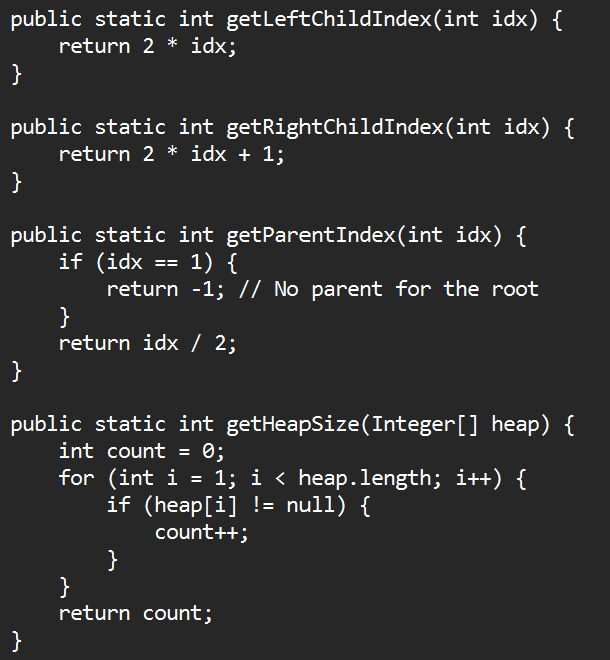

#### **`max_heapify(A, i)`**  
   - Ensures the heap property for the array `A`, starting at node `i`.  
   - Also known as the **“sink”** operation since it **moves lighter elements down the tree.**

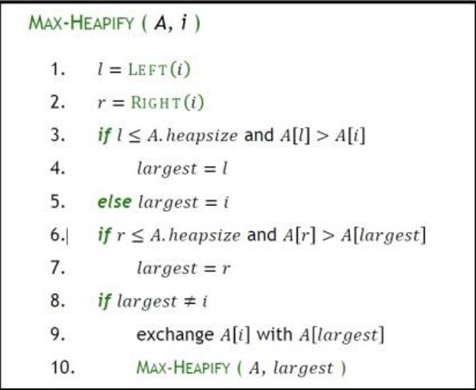

In [ ]:
def max_heapify(A, index, heap_size): # Also known as "Sink"
    """
    Ensures the max-heap property is maintained by sinking
    the element at `index` down the heap. Also known as "Sink".
    Compares the element at `index` with its left and right children, and
    swaps it with the largest of the three,
    recursively heapifying the affected subtree.
    """

    left_child_index = get_left_child_index(index)
    right_child_index = get_right_child_index(index)

    # Finding the largest among index (parent), left child, and right child
    largest = index # parent

    if (left_child_index <= heap_size) and (left_child_index > 0):
        if A[left_child_index] > A[largest]:
            largest = left_child_index

    if (right_child_index <= heap_size) and (right_child_index > 0):
        if A[right_child_index] > A[largest]:
            largest = right_child_index

    # If index is not the largest, swap it with the left/right child which is largest
    if largest != index:

        # Swapping A[index] and A[largest]
        temp = A[index]
        A[index] = A[largest]
        A[largest] = temp

        # Recursively heapify the affected subtree (child)
        max_heapify(A, largest, heap_size)

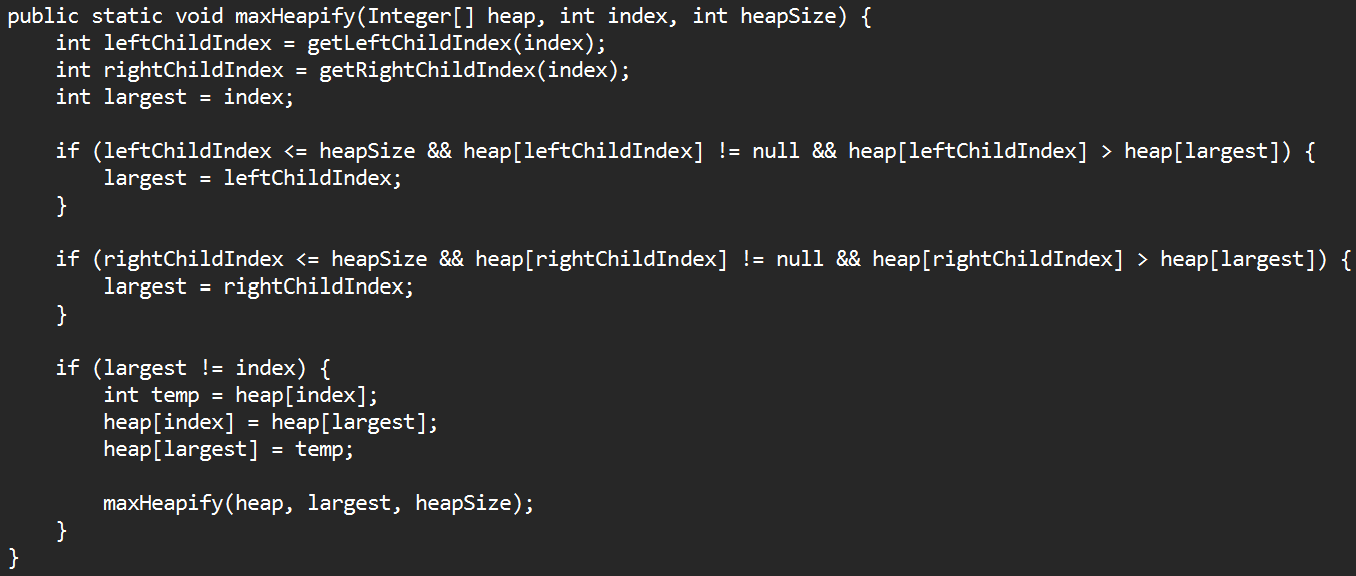

#### **`build_max_heap(A)`**  
   - Builds a max-heap from an array `A`.

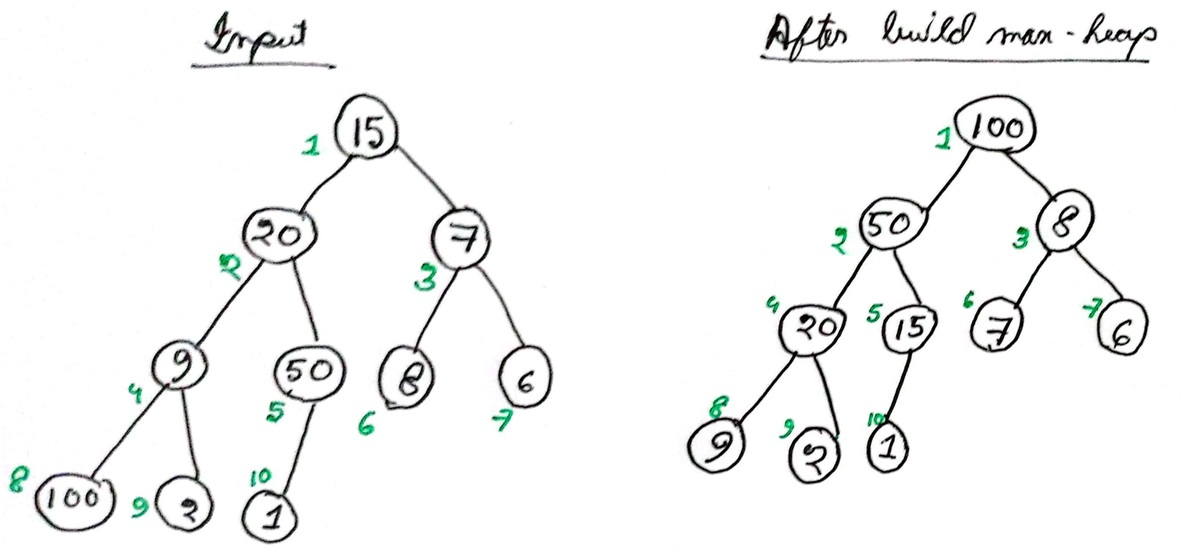

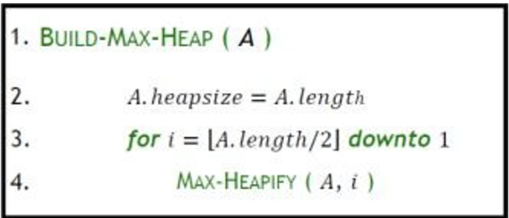

In [ ]:
def build_max_heap(A):
    """
    Converts an unsorted array `A` into a max-heap by repeatedly calling `max_heapify`
    on each internal nodes, starting from the last internal node down to the root.
    """
    heap_size = get_heap_size(A)
    for i in range(heap_size // 2, 0, -1): # From last internal nodes to the root (index 1)
        max_heapify(A, i, heap_size)


def get_max_value(heap):
    """
    Returns the maximum value from the heap (root of the heap) if the heap is not empty.
    Returns None if the heap is empty or invalid.
    """
    # Check if the heap has at least one valid element
    if len(heap) > 1 and heap[1] is not None:
        return heap[1]  # Return the root value
    else:
        return None  # Return None if the heap is empty or invalid

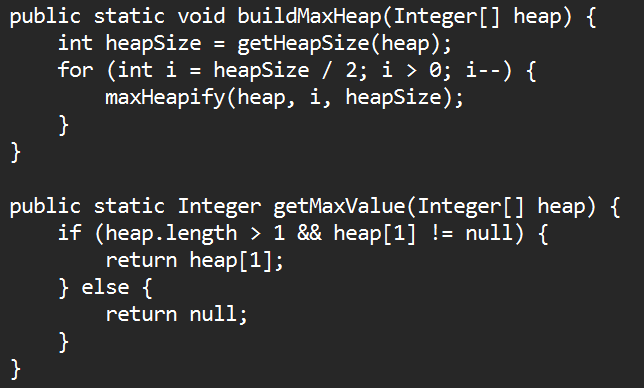

In [ ]:
# Tree representation as an array:
# The tree starts at index 1, so A[0] is None.
A = [None, 15, 20, 7, 9, 50,  8, 6, 100, 2, 1]
#      0    1   2  3  4   5   6  7   8   9  10

# Print the initial array
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap
print("After build-max-heap: Max-Heap array representation:", A[1:])

# Get the maximum value in the heap
print("Maximum value in the heap:", get_max_value(A))

# Calculate the heap size using get_heap_size
calculated_heap_size = get_heap_size(A)

# Print the result
print("Calculated heap size:", calculated_heap_size)

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
After build-max-heap: Max-Heap array representation: [100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
Maximum value in the heap: 100
Calculated heap size: 10


### Max Heap Extraction/Deletion

deleting 44 at the root (index 1)
1.   The root `(index 1)` was replaced using the last item of the heap.
2.   Then `sink()/max_heapify()` was called at the root `(index 1)`.


---


![SegmentLocal](https://www.tutorialspoint.com/data_structures_algorithms/images/max_heap_deletion_animation.gif "segment")

---

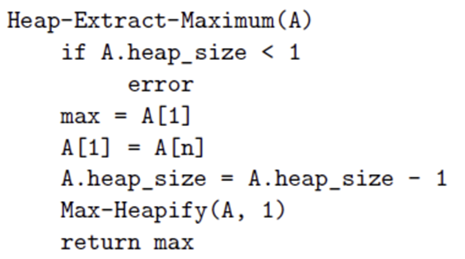

In [ ]:
def heap_extract_max(heap):
    """
    Extracts the maximum value (top item) from the max-heap,
    restructures the heap to maintain the max-heap property,
    and returns the extracted maximum value.
    """
    heap_size = get_heap_size(heap)
    if heap_size<1:
        print("Heap is empty")
        return

    # Get the maximum value (root of the heap)
    max_value = get_max_value(heap) # max_value = heap[1]

    # Replace the root with the last item and delete the last item
    heap[1] = heap[heap_size]
    heap[heap_size] = None

    # Restore the heap property starting from the root
    # Call max_heapify()/SINK() from 1 index (root) to bottom
    max_heapify(heap, 1, get_heap_size(heap))

    return max_value

##########################################################
# Tree representation as an array:
A = [None, 15, 20, 7, 9, 50,  8, 6, 100, 2, 1]
#      0    1   2  3  4   5   6  7   8   9  10

# Print the initial array
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap
print("After build-max-heap: Max-Heap array representation:", A[1:])

# Get the maximum value in the heap
print("Maximum value in the heap:", get_max_value(A))
print('-'*50)

####################################################
# Extract the maximum value
extracted_value = heap_extract_max(A)

# Print the extracted maximum value
print("First Extracted Maximum Value:", extracted_value)

# Print the heap after extraction
print("Heap after extracting max:", A[1:])

# Calculate the updated heap size
updated_heap_size = get_heap_size(A)

# Print the updated heap size
print("Updated heap size:", updated_heap_size)
print('-'*50)

######################################################
# Repeat extraction to test further
extracted_value_2 = heap_extract_max(A)
print("Second Extracted Maximum Value:", extracted_value_2)
print("Heap after second extraction:", A[1:])

#[100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
# 1    2   3   4   5  6  7  8  9  10

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
After build-max-heap: Max-Heap array representation: [100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
Maximum value in the heap: 100
--------------------------------------------------
First Extracted Maximum Value: 100
Heap after extracting max: [50, 20, 8, 9, 15, 7, 6, 1, 2, None]
Updated heap size: 9
--------------------------------------------------
Second Extracted Maximum Value: 50
Heap after second extraction: [20, 15, 8, 9, 2, 7, 6, 1, None, None]


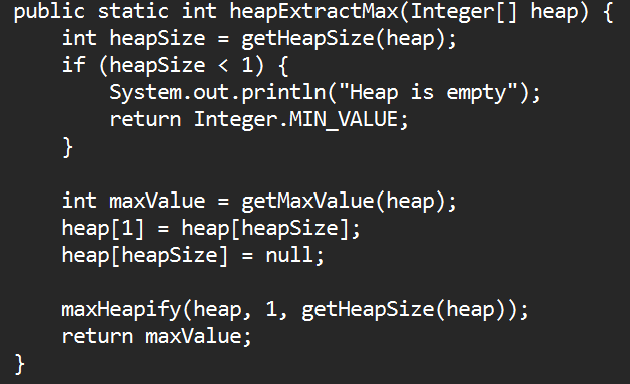

### Delete any node from Heap **[Optional for theory--needed for lab task]**

In [ ]:
def heap_delete_any_node(heap, idx):
    """
    Deletes the node at the specified index in the max-heap and restores the heap property.

    The function swaps the node with the last element, removes the last element,
    and then heapifies the heap to maintain the max-heap property.
    """
    heap_size = get_heap_size(heap)

    # Validate the index and check if the heap is not empty
    if idx <= 0 or idx > heap_size:
        print("Invalid index or empty heap")
        return None

    # Store the value to be deleted
    deleted_val = heap[idx]

    # Swap the node with the last element using a temporary variable
    temp = heap[idx]  # Store the value at the current index in temp
    heap[idx] = heap[heap_size]  # Replace the value at idx with the last element
    heap[heap_size] = temp  # Set the last element to the value stored in temp

    heap[heap_size] = None

    # Restore the max heap property starting from the index of the swapped node
    max_heapify(heap, idx, get_heap_size(heap))

    return deleted_val
##########################################################


# Tree representation as an array:
A = [None, 15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
#      0    1   2  3  4   5   6  7   8   9  10

# Print the initial array before building the max heap
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap after building it
print("After build-max-heap: Max-Heap array representation:", A[1:])
print('-' * 50)
########################################################################

# Test the heap_delete_any_node function
idx_to_delete = 5  # Index of the node to delete (original value 50)
print(f"Deleting node at index {idx_to_delete} with value {A[idx_to_delete]}")

# Delete the node
deleted_value = heap_delete_any_node(A, idx_to_delete)

# Print the heap after deletion
print(f"After deleting node: Heap array representation: {A[1:]}")
print(f"Deleted value: {deleted_value}")
print('-' * 50)
########################################################################

# Test the heap_delete_any_node function
idx_to_delete = 7  # Index of the node to delete (original value 6)
print(f"Deleting node at index {idx_to_delete} with value {A[idx_to_delete]}")

# Delete the node
deleted_value = heap_delete_any_node(A, idx_to_delete)

# Print the heap after deletion
print(f"After deleting node: Heap array representation: {A[1:]}")
print(f"Deleted value: {deleted_value}")
print('-' * 50)

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
After build-max-heap: Max-Heap array representation: [100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
--------------------------------------------------
Deleting node at index 5 with value 15
After deleting node: Heap array representation: [100, 50, 8, 20, 1, 7, 6, 9, 2, None]
Deleted value: 15
--------------------------------------------------
Deleting node at index 7 with value 6
After deleting node: Heap array representation: [100, 50, 8, 20, 1, 7, 2, 9, None, None]
Deleted value: 6
--------------------------------------------------


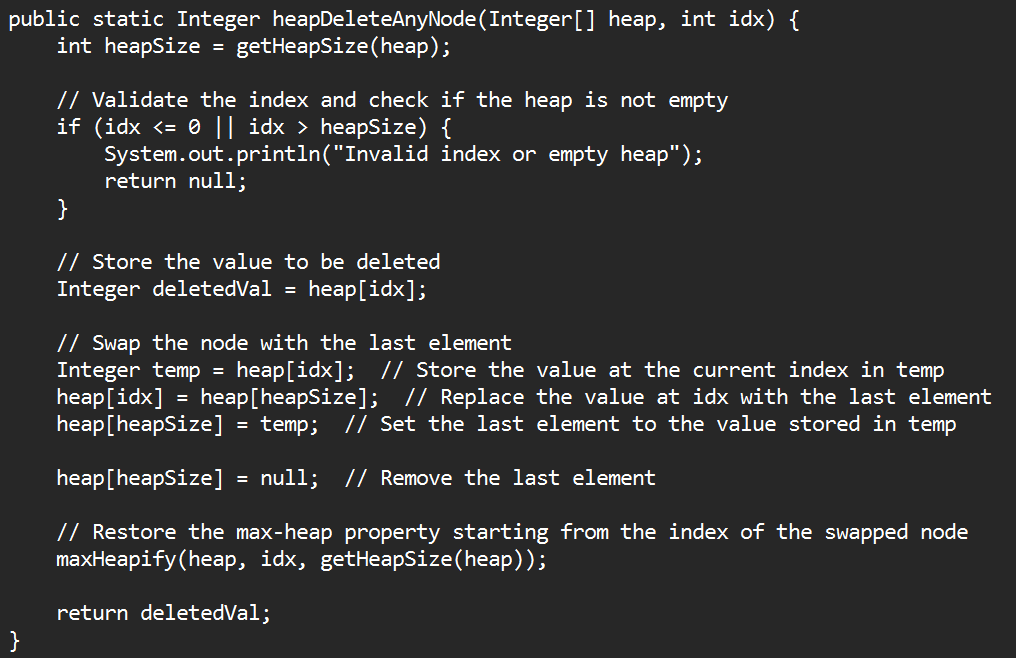

### Heap increase key / Swim

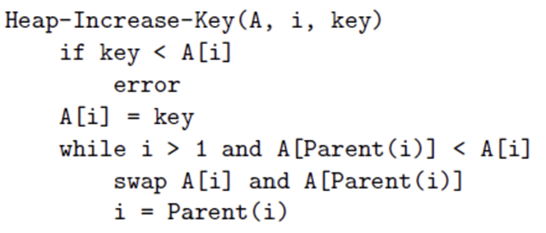

In [ ]:
def heap_increase_key(heap, idx, key):
    """
    Increases the value of the element at `idx` in the `heap` to `key`
    and ensures the heap property is maintained by swimming the element upwards.
    Also known as Swim.
    """
    if key < heap[idx]:
        print("New key is smaller than current key")
        return

    # Set the current index to the new key
    heap[idx] = key

    # if current index is larger than parent, swap parent and the current index
    # (Swim the element upwards as long as it's greater than its parent)
    while idx > 1 and heap[get_parent_index(idx)] < heap[idx]:
        # Swap the current element with its parent

        #heap[get_parent_index(idx)], heap[idx] = heap[idx], heap[get_parent_index(idx)] # #--Python swapping
        temp = heap[get_parent_index(idx)]
        heap[get_parent_index(idx)] = heap[idx]
        heap[idx] = temp

        # Move the index to the parent's position
        idx = get_parent_index(idx)


# Tree representation as an array:
A = [None, 15, 20, 7, 9, 50,  8, 6, 100, 2, 1]
#      0    1   2  3  4   5   6  7   8   9  10

# Print the initial array
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap
print("After build-max-heap: Max-Heap array representation:", A[1:])

print('-'*50)
#####################################################################################

# Test heap_increase_key
index_to_increase = 5  # Index of the current key (Originally was 15)
new_key_value = 60     # New key value to assign (Making it 50)

print(f"Before increasing key at index {index_to_increase}: {A[index_to_increase]}")
heap_increase_key(A, index_to_increase, new_key_value)
print(f"After increasing key at index {index_to_increase}: {A[index_to_increase]}")

# Print the max heap after increase key
print("Updated Max-Heap array representation:", A[1:])

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
After build-max-heap: Max-Heap array representation: [100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
--------------------------------------------------
Before increasing key at index 5: 15
After increasing key at index 5: 50
Updated Max-Heap array representation: [100, 60, 8, 20, 50, 7, 6, 9, 2, 1]


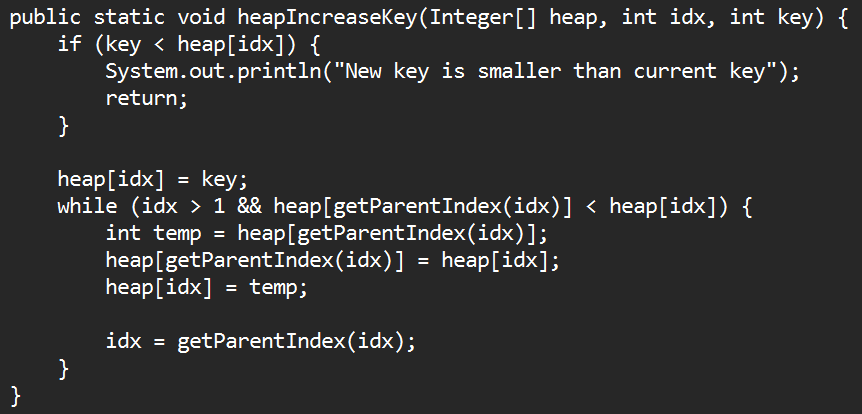

In [ ]:
def heap_increase_key_recursive(heap, idx, key):
    """
    Increases the value of the element at `idx` in the `heap` to `key`
    and ensures the heap property is maintained by swimming the element upwards.
    This function works recursively.
    """
    if key < heap[idx]:
        print("New key is smaller than current key")
        return

    # Increase the value of the element at idx
    heap[idx] = key

    # If the current element is larger than its parent, swap them
    if idx > 1 and heap[get_parent_index(idx)] < heap[idx]:
        #heap[get_parent_index(idx)], heap[idx] = heap[idx], heap[get_parent_index(idx)] #--Python swapping

        temp = heap[get_parent_index(idx)]
        heap[get_parent_index(idx)] = heap[idx]
        heap[idx] = temp

        # Recursively call the function for the parent index
        heap_increase_key_recursive(heap=heap, idx=get_parent_index(idx), key=key) # updating the index after each call


# Tree representation as an array:
A = [None, 15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
#      0    1   2  3  4   5   6  7   8   9  10

# Print the initial array
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap
print("After build-max-heap: Max-Heap array representation:", A[1:])

print('-'*50)
#####################################################################################

# Test heap_increase_key_recursive
index_to_increase = 5  # Index of the current key (Originally was 50)
new_key_value = 60     # New key value to assign (Making it 60)

print(f"Before increasing key at index {index_to_increase}: {A[index_to_increase]}")
heap_increase_key_recursive(A, index_to_increase, new_key_value)
print(f"After increasing key at index {index_to_increase}: {A[index_to_increase]}")

# Print the max heap after increase key
print("Updated Max-Heap array representation:", A[1:])

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
After build-max-heap: Max-Heap array representation: [100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
--------------------------------------------------
Before increasing key at index 5: 15
After increasing key at index 5: 50
Updated Max-Heap array representation: [100, 60, 8, 20, 50, 7, 6, 9, 2, 1]


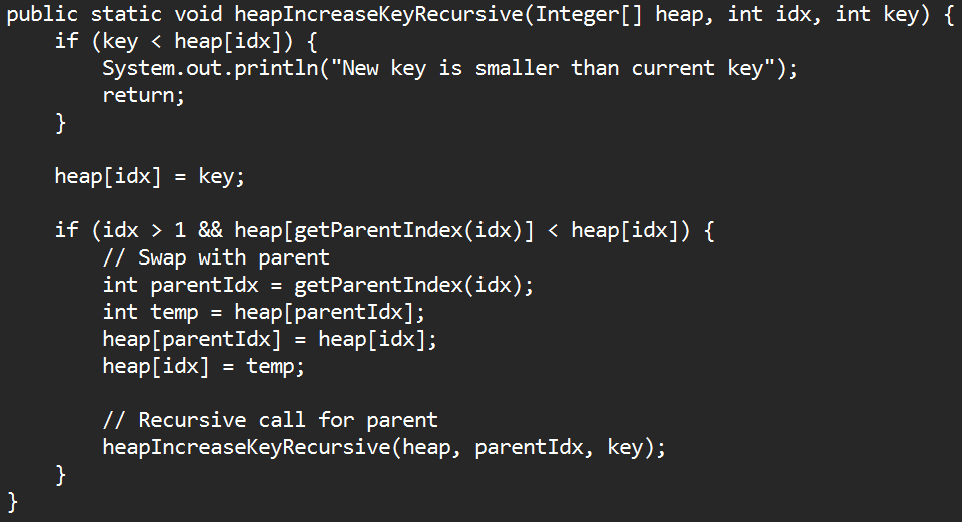

### Max Heap Insertion

inserting 44
1.   44 was inserted at the last level at the proper place.
2.   Then `swim()` was called at that index.

---



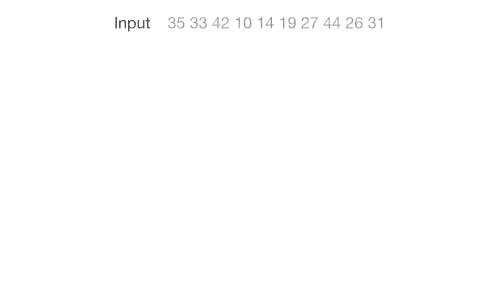

---

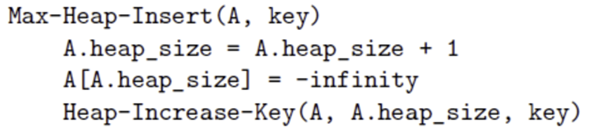

In [ ]:
def max_heap_insert(heap, key):
    """
    Inserts a new key into the max-heap while maintaining the heap property.
    It adds the key to the next available position in the heap array
    and then swims the key upwards to restore the heap property.
    """
    heap_size = get_heap_size(heap)
    next_available_slot = heap_size + 1

    # Check if there is space for a new element
    if next_available_slot == len(heap):  # assuming the heap is implemented as a fixed-size array
        print("No Space Left for", key)
        return

    # Following algorithm, insert the -inf at the next available position
    # We could have directly inserted the key --But for following algorithm inserted -inf
    heap[next_available_slot] = float('-inf')
    #heap[next_available_slot] = key # Also correct

    # Now SWIM (heap_increase_key) from the new last index to the top
    heap_increase_key(heap, next_available_slot, key)

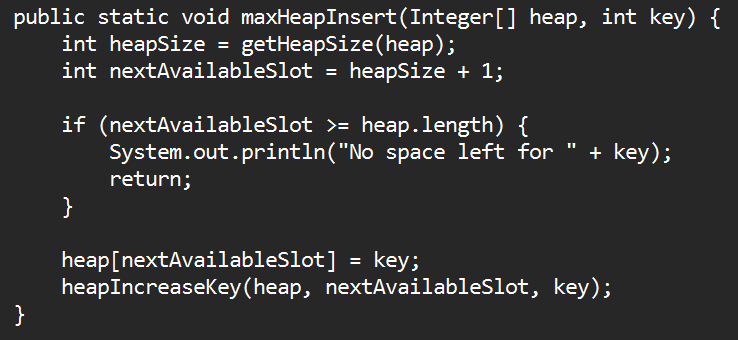

In [ ]:
# Tree representation as an array:
A = [None, 15, 20, 7, 9,  8, 6, 100, 2,  1, None, None, None]
#      0    1   2  3  4   5   6  7   8   9  10    11    12

# Print the initial array before building the max heap
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap after building it
print("After build-max-heap: Max-Heap array representation:", A[1:])

print('-' * 50)
#################################################################
# Now testing the `max_heap_insert` function

new_key = 60  # New key to be inserted

# Print before inserting the new key
print(f"Before max-heap insert: {A[1:]}")

# Insert the new key into the heap
max_heap_insert(A, new_key)

# Print the resulting heap after insertion
print(f"After max-heap insert of key {new_key}: {A[1:]}")
print('-'*50)
#################################################################
# Now testing the `max_heap_insert` function

new_key = 30  # New key to be inserted

# Print before inserting the new key
print(f"Before max-heap insert: {A[1:]}")

# Insert the new key into the heap
max_heap_insert(A, new_key)

# Print the resulting heap after insertion
print(f"After max-heap insert of key {new_key}: {A[1:]}")

########################################################################################
# Fixed-size array representation of a heap:
# Index 0 is ignored for simplicity (1-based index heap)
A = [None, 100, 50, 70, 30, 20, 60, 40, 10, 5, 2]  # Fully filled heap array (size=10)

# Print the current heap
print("Before trying to insert:", A[1:])

# Attempt to insert a new key
new_key = 80

# Call max_heap_insert
max_heap_insert(A, new_key)

# Print the result after attempting insertion
print("After attempting to insert:", A[1:])

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 8, 6, 100, 2, 1, None, None, None]
After build-max-heap: Max-Heap array representation: [100, 20, 15, 9, 8, 6, 7, 2, 1, None, None, None]
--------------------------------------------------
Before max-heap insert: [100, 20, 15, 9, 8, 6, 7, 2, 1, None, None, None]
After max-heap insert of key 60: [100, 60, 15, 9, 20, 6, 7, 2, 1, 8, None, None]
--------------------------------------------------
Before max-heap insert: [100, 60, 15, 9, 20, 6, 7, 2, 1, 8, None, None]
After max-heap insert of key 30: [100, 60, 15, 9, 30, 6, 7, 2, 1, 8, 20, None]
Before trying to insert: [100, 50, 70, 30, 20, 60, 40, 10, 5, 2]
No Space Left for 80
After attempting to insert: [100, 50, 70, 30, 20, 60, 40, 10, 5, 2]


### Heapsort using maxheap
#### Differences in Sorting Order
- Max Heap: Sorts in **ascending** order by repeatedly moving the **largest elements to the end.**
- Min Heap: Sorts in **descending** order by repeatedly moving the **smallest elements to the end.**

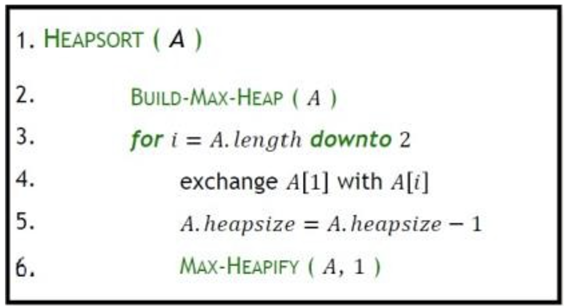

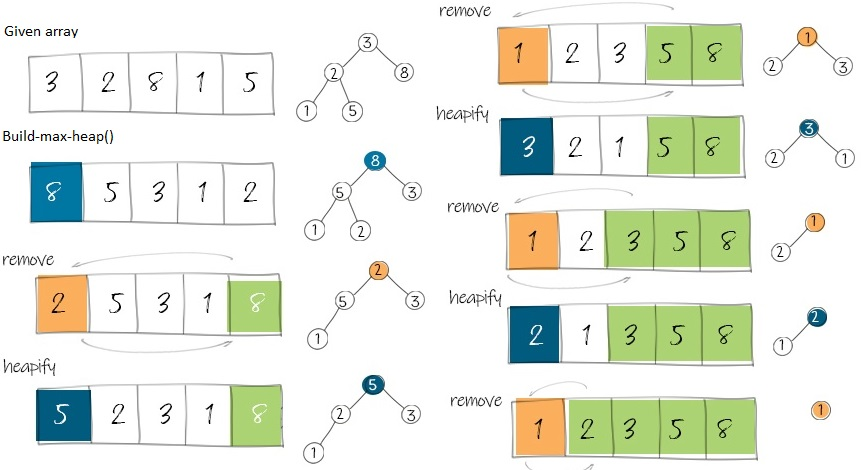

In [ ]:
def heapsort(arr):
    build_max_heap(arr)
    for i in range(get_heap_size(arr), 1, -1): # runs till index 2

        # Swap arr[1] and arr[i]
        temp = arr[1]
        arr[1] = arr[i]
        arr[i] = temp

        # Call max_heapify to restore the heap property
        # here, by i-1 we are reducing the heap_size,
        # to keep the sorted elements on the right similar to selection sort
        max_heapify(A = arr, index = 1, heap_size = i - 1)

# Tester part
# Tree representation as an array:
A = [None, 15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
#      0    1   2  3  4   5   6  7   8   9  10

# Print the initial array
print("Before build-max-heap: Initial array representation:", A[1:])

# Build the max heap
build_max_heap(A)

# Print the resulting max heap
print("After build-max-heap: Max-Heap array representation:", A[1:])

# Perform heapsort
heapsort(A)

# Print the sorted array after heapsort
print("Sorted array using heapsort:", A[1:])

Before build-max-heap: Initial array representation: [15, 20, 7, 9, 50, 8, 6, 100, 2, 1]
After build-max-heap: Max-Heap array representation: [100, 50, 8, 20, 15, 7, 6, 9, 2, 1]
Sorted array using heapsort: [1, 2, 6, 7, 8, 9, 15, 20, 50, 100]


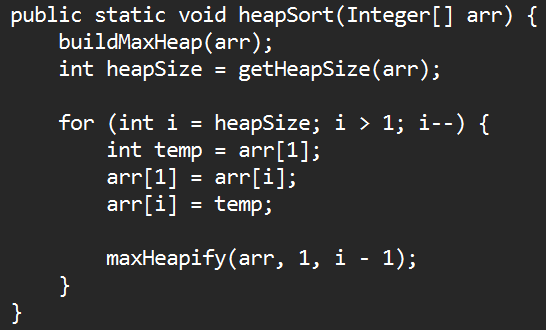

## MaxHeap Class - optional

In [ ]:
class MaxHeap:
    def __init__(self, size):
        self.heap = [None] * (size + 1)  # 1-based indexing
        self.size = 0

    def get_left_child_index(self, idx):
        return 2 * idx

    def get_right_child_index(self, idx):
        return 2 * idx + 1

    def get_parent_index(self, idx):
        if idx == 1:
            return None
        return idx // 2

    def max_heapify(self, index):
        left_child_index = self.get_left_child_index(index)
        right_child_index = self.get_right_child_index(index)

        largest = index

        if left_child_index <= self.size and self.heap[left_child_index] > self.heap[largest]:
            largest = left_child_index

        if right_child_index <= self.size and self.heap[right_child_index] > self.heap[largest]:
            largest = right_child_index

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self.max_heapify(largest)

    def heap_increase_key(self, idx, key):
        if key < self.heap[idx]:
            print("New key is smaller than current key. Cannot insert.")
            return

        self.heap[idx] = key
        while idx > 1 and self.heap[self.get_parent_index(idx)] < self.heap[idx]:
            parent_idx = self.get_parent_index(idx)
            self.heap[idx], self.heap[parent_idx] = self.heap[parent_idx], self.heap[idx]
            idx = parent_idx

    def max_heap_insert(self, key):
        """
        Inserts a new key into the max-heap while maintaining the heap property.
        Adds the key to the next available position and swims it upwards.
        """
        if self.size >= len(self.heap) - 1:  # Fix: len(self.heap) - 1 because index 0 is unused
            print("No Space Left for", key)
            return

        self.size += 1
        self.heap[self.size] = float('-inf')  # Initially set to -infinity
        self.heap_increase_key(self.size, key)

    def delete_max(self):
        if self.size < 1:
            return None
        max_value = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.max_heapify(1)
        return max_value

    def build_max_heap(self):
        """
        Converts an unsorted array into a max-heap.
        """
        for i in range(self.size // 2, 0, -1):
            self.max_heapify(i)


# Initialize MaxHeap with size 10
max_heap = MaxHeap(10)

# Sample operations
operations = [
    ('insert', 10),
    ('insert', 20),
    ('insert', 5),
    ('insert', 30),
    ('delete',),
    ('insert', 25),
    ('delete',),
    ('build',)
]

# Process each operation
for operation in operations:
    if operation[0] == 'insert':
        max_heap.max_heap_insert(operation[1])
        print(f"Inserted {operation[1]}: {max_heap.heap[1:max_heap.size+1]}")
    elif operation[0] == 'delete':
        max_val = max_heap.delete_max()
        print(f"Deleted max value {max_val}: {max_heap.heap[1:max_heap.size+1]}")
    elif operation[0] == 'build':
        max_heap.build_max_heap()
        print(f"Built max heap: {max_heap.heap[1:max_heap.size+1]}")
    else:
        print("Unknown operation!")


Inserted 10: [10]
Inserted 20: [20, 10]
Inserted 5: [20, 10, 5]
Inserted 30: [30, 20, 5, 10]
Deleted max value 30: [20, 10, 5]
Inserted 25: [25, 20, 5, 10]
Deleted max value 25: [20, 10, 5]
Built max heap: [20, 10, 5]


## **Min Heap**


###**Min Heap Insertion Simulation**

---

**inserting 70**

![SegmentLocal](https://miro.medium.com/v2/resize:fit:720/format:webp/1*jeELUYrAVbZJg6S1E2ujjA.gif "segment")

---

### **Min Heap Deletion/Extraction Simulation**

---

**Extracting min 10**
![SegmentLocal](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*j6SmjQvS1-FPcONVtEkN1w.gif "segment")

---

## MinHeap Class - optional

In [ ]:
class MinHeap:
    def __init__(self, size):
        self.heap = [None] * (size + 1)  # 1-based indexing
        self.size = 0

    def get_left_child_index(self, idx):
        return 2 * idx

    def get_right_child_index(self, idx):
        return 2 * idx + 1

    def get_parent_index(self, idx):
        if idx == 1:
            return None
        return idx // 2

    def min_heapify(self, index):
        left_child_index = self.get_left_child_index(index)
        right_child_index = self.get_right_child_index(index)

        smallest = index

        if left_child_index <= self.size and self.heap[left_child_index] < self.heap[smallest]:
            smallest = left_child_index

        if right_child_index <= self.size and self.heap[right_child_index] < self.heap[smallest]:
            smallest = right_child_index

        if smallest != index:
            self.heap[index], self.heap[smallest] = self.heap[smallest], self.heap[index]
            self.min_heapify(smallest)

    def heap_decrease_key(self, idx, key):
        if key > self.heap[idx]:
            print("New key is larger than current key. Cannot insert.")
            return

        self.heap[idx] = key
        while idx > 1 and self.heap[self.get_parent_index(idx)] > self.heap[idx]:
            parent_idx = self.get_parent_index(idx)
            self.heap[idx], self.heap[parent_idx] = self.heap[parent_idx], self.heap[idx]
            idx = parent_idx

    def min_heap_insert(self, key):
        """
        Inserts a new key into the min-heap while maintaining the heap property.
        Adds the key to the next available position and swims it upwards.
        """
        if self.size >= len(self.heap) - 1:
            print("No Space Left for", key)
            return

        self.size += 1
        self.heap[self.size] = float('inf')  # Initially set to +infinity
        self.heap_decrease_key(self.size, key)

    def delete_min(self):
        if self.size < 1:
            return None
        min_value = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.min_heapify(1)
        return min_value

    def build_min_heap(self):
        """
        Converts an unsorted array into a min-heap.
        """
        for i in range(self.size // 2, 0, -1):
            self.min_heapify(i)


# Initialize MinHeap with size 10
min_heap = MinHeap(10)

# Sample operations
operations = [
    ('insert', 30),
    ('insert', 20),
    ('insert', 40),
    ('insert', 10),
    ('delete',),
    ('insert', 5),
    ('delete',),
    ('build',)
]

# Process each operation
for operation in operations:
    if operation[0] == 'insert':
        min_heap.min_heap_insert(operation[1])
        print(f"Inserted {operation[1]}: {min_heap.heap[1:min_heap.size+1]}")
    elif operation[0] == 'delete':
        min_val = min_heap.delete_min()
        print(f"Deleted min value {min_val}: {min_heap.heap[1:min_heap.size+1]}")
    elif operation[0] == 'build':
        min_heap.build_min_heap()
        print(f"Built min heap: {min_heap.heap[1:min_heap.size+1]}")
    else:
        print("Unknown operation!")


Inserted 30: [30]
Inserted 20: [20, 30]
Inserted 40: [20, 30, 40]
Inserted 10: [10, 20, 40, 30]
Deleted min value 10: [20, 30, 40]
Inserted 5: [5, 20, 40, 30]
Deleted min value 5: [20, 30, 40]
Built min heap: [20, 30, 40]
